In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet

In [3]:
def read_train():
    train_test =  fastparquet.ParquetFile("../input/train_test.parq").to_pandas()
    return train_test[train_test['istrain']] 

In [4]:
%time train =read_train()
train.shape 

CPU times: user 29.3 s, sys: 20.6 s, total: 49.9 s
Wall time: 49.9 s


(125497040, 15)

In [5]:
train.head()

date  istrain  item_nbr  onpromotion  store_nbr  unit_sales  \
index                                                                     
0     2013-01-01     True    103665           -1         25    2.079442   
1     2013-01-01     True    105574           -1         25    0.693147   
2     2013-01-01     True    105575           -1         25    1.098612   
3     2013-01-01     True    108079           -1         25    0.693147   
4     2013-01-01     True    108701           -1         25    0.693147   

       dcoilwtico  city  state  type  cluster  holiday  family  class  \
index                                                                   
0             NaN    20     13     3        1     True       5   2712   
1             NaN    20     13     3        1     True      12   1045   
2             NaN    20     13     3        1     True      12   1045   
3             NaN    20     13     3        1     True      12   1030   
4             NaN    20     13     3        1     True       9   2644   

       perishable  
index              
0               1  
1               0  
2               0  
3               0  
4               1

In [9]:
df=train[['item_nbr','date']].groupby('item_nbr').aggregate({'date': ['min', 'max']})

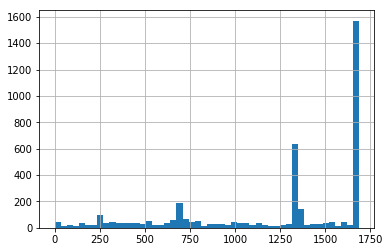

In [16]:
(df['date']['max']-df['date']['min']).sort_values().map(lambda u: u.days).hist(bins=50);

In [21]:
df=train[['item_nbr','store_nbr','date']].groupby(['item_nbr','store_nbr']).aggregate({'date': ['min', 'max','count']})

In [22]:
(df['date']['max']-df['date']['min']).sort_values().map(lambda u: u.days).hist(bins=50);

In [24]:
df['percent']=df['date']['count']/((df['date']['max']-df['date']['min']).map(lambda u: u.days)+1)

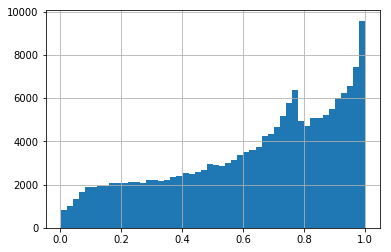

In [25]:
df['percent'].hist(bins=50);

In [26]:
import gc
gc.collect()

5087